# Problem Set 4, due October 23 at 11:59pm

### Before You Start

This is a fun but challenging problem set. It will test your python skills, as well as your understanding of the material in class and in the readings. Start early and debug often! Some notes:

* Part 1 is meant to be easy, so get through it quickly.
* Part 2 (especially 2.1) will be difficult, but it is the lynchpin of this problem set to make sure to do it well and understand what you've done. If you find your gradient descent algorithm is taking more than a few minutes to complete, debug more, compare notes with others, and go to the TA sessions (especially the sections on vectorized computation and computational efficiency).
* Depending on how well you've done 2.1, parts 2.3 and 4.3 will be relatively painless or incredibly painful. 
* Part 4 (especially 4.3) will be computationally intensive. Don't leave this until the last minute, otherwise your code might be running when the deadline arrives.
* Do the extra credit problems last.

---

## Introduction to the assignment

As with the last assignment, you will be using the [Boston Housing Prices Data Set](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

In [1]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

%matplotlib inline  
import matplotlib.pyplot as plt  
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

from numpy import linalg as LA


/Users/judyjinn/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
from sklearn.datasets import load_boston
bdata = load_boston()

---

## Part 1: Getting oriented


### 1.1 Use existing libraries

Soon, you will write your own gradient descent algorithm, which you will then use to minimize the squared error cost function.  First, however, let's use the canned versions that come with Python, to make sure we understand what we're aiming to achieve.

Using the same Boston housing prices dataset, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to explore the relationship between  median housing price and number of rooms per house. Do this by first (a) regressing the housing price on the number of rooms per house, and then (b) regressing the housing price on the number of rooms per house and the (number of rooms per house) squared.  Interpret your results.

In [3]:
# uncomment the following if you want to see a lengthy description of the dataset
# print(bdata.keys())
# print(bdata.feature_names)
# print(bdata.data.shape)
# print(bdata.target.shape)
# print(bdata.DESCR)

boston = pd.DataFrame(bdata['data'])
boston.columns = bdata.feature_names[:]
boston['MEDV'] = bdata.target

# X and Ys 
rm = np.asarray(boston['RM'].to_frame())
medv = np.asarray( boston['MEDV'])

reg_rm = linear_model.LinearRegression(fit_intercept=True, normalize=False)
# X must be (m, n) shape, cannot be (m, )
# Y must be a (m, ) shape though.
# .to_frame() forces the RM series into a frame with (506, 1) dimensions
reg_rm.fit(rm, medv) 
print('The coefficient for regressing rooms against housing value is', reg_rm.coef_[0])
print('R2 value is', reg_rm.score(rm, medv) )

print('\n')

reg_rm2 = linear_model.LinearRegression(fit_intercept=True, normalize=False)
reg_rm2.fit(rm**2, medv)
print('The coefficient for regressing rooms squared against housing value is', reg_rm2.coef_[0])
print('R2 value is', reg_rm2.score(rm**2, medv))

The coefficient for regressing rooms against housing value is 9.10210898118
R2 value is 0.483525455991


The coefficient for regressing rooms squared against housing value is 0.727469028665
R2 value is 0.515767069207


In part (a) we see that the coefficient is 9.1. We can interpret this to mean for each increase in the number of rooms, the average increase in median housing value would increase by 9.1k. 

In part (b) the meaning of this coefficient is less clear. What we have done is squared the room numbers before comparing them to the median housing values to build more model. Therefore it is harder to say what this coefficient represents.

However, if we compare the R2 values, we see that the value is higher for part (b) than part (a). Therefore, we see that by transforming the data, we find a better fit for predicting median housing values.

### 1.2 Training and testing

Chances are, for the above problem you used all of your data to fit the regression line. In some circumstances this is a reasonable thing to do, but often this will result in overfitting. Let's redo the above results the ML way, using careful cross-validation.  Since you are now experts in cross-validation, and have written your own cross-validation algorithm from scratch, you can now take a shortcut and use the libraries that others have built for you.

Using the [cross-validation functions](http://scikit-learn.org/stable/modules/cross_validation.html) from scikit-learn, use 25-fold cross-validation to fit regression (a) above, i.e. the linear fit of housing price on number of rooms per house. Each fold of cross-validation will give you one slope coefficient and one intercept coefficient.  Plot the distribution of the 25 slope coefficients using a histogram, then draw a vertical line at the value of the slope coefficient that you estimated in 1.1 using the full dataset.  What do you notice?

[[ 5.965]
 [ 6.142]
 [ 5.813]
 [ 5.924]
 [ 5.599]
 [ 5.813]
 [ 6.047]
 [ 6.495]
 [ 6.674]
 [ 5.713]
 [ 6.072]
 [ 5.95 ]
 [ 5.701]
 [ 6.096]
 [ 5.933]
 [ 5.841]
 [ 5.85 ]
 [ 5.966]
 [ 6.595]
 [ 7.024]
 [ 6.77 ]
 [ 6.169]
 [ 6.211]
 [ 6.069]
 [ 5.682]
 [ 5.786]
 [ 6.03 ]
 [ 5.399]
 [ 5.602]
 [ 5.963]
 [ 6.115]
 [ 6.511]
 [ 5.998]
 [ 5.888]
 [ 7.249]
 [ 6.383]
 [ 6.816]
 [ 6.145]
 [ 5.927]
 [ 5.741]
 [ 5.966]
 [ 6.456]
 [ 6.762]
 [ 7.104]
 [ 6.29 ]
 [ 5.787]
 [ 5.878]
 [ 5.594]
 [ 5.885]
 [ 6.417]
 [ 5.961]
 [ 6.065]
 [ 6.245]
 [ 6.273]
 [ 6.286]
 [ 6.279]
 [ 6.14 ]
 [ 6.232]
 [ 5.874]
 [ 6.727]
 [ 6.619]
 [ 6.302]
 [ 6.167]
 [ 6.389]
 [ 6.63 ]
 [ 6.015]
 [ 6.121]
 [ 7.007]
 [ 7.079]
 [ 6.417]
 [ 6.405]
 [ 6.442]
 [ 6.211]
 [ 6.249]
 [ 6.625]
 [ 6.163]
 [ 8.069]
 [ 7.82 ]
 [ 7.416]
 [ 6.727]
 [ 6.781]
 [ 6.405]
 [ 6.137]
 [ 6.167]
 [ 5.851]
 [ 5.836]
 [ 6.127]
 [ 6.474]
 [ 6.229]
 [ 6.195]
 [ 6.715]
 [ 5.913]
 [ 6.092]
 [ 6.254]
 [ 5.928]
 [ 6.176]
 [ 6.021]
 [ 5.872]
 [ 5.731]
 [ 5.87 ]


[[ 6.575]
 [ 6.421]
 [ 7.185]
 [ 6.998]
 [ 7.147]
 [ 6.43 ]
 [ 6.012]
 [ 6.172]
 [ 5.631]
 [ 6.004]
 [ 6.377]
 [ 6.009]
 [ 5.889]
 [ 5.949]
 [ 6.096]
 [ 5.834]
 [ 5.935]
 [ 5.99 ]
 [ 5.456]
 [ 5.727]
 [ 5.57 ]
 [ 5.965]
 [ 6.142]
 [ 5.813]
 [ 5.924]
 [ 5.599]
 [ 5.813]
 [ 6.047]
 [ 6.495]
 [ 6.674]
 [ 5.713]
 [ 6.072]
 [ 5.95 ]
 [ 5.701]
 [ 6.096]
 [ 5.933]
 [ 5.841]
 [ 5.85 ]
 [ 5.966]
 [ 6.595]
 [ 7.024]
 [ 6.77 ]
 [ 6.169]
 [ 6.211]
 [ 6.069]
 [ 5.682]
 [ 5.786]
 [ 6.03 ]
 [ 5.399]
 [ 5.602]
 [ 5.963]
 [ 6.115]
 [ 6.511]
 [ 5.998]
 [ 5.888]
 [ 7.249]
 [ 6.383]
 [ 6.816]
 [ 6.145]
 [ 5.927]
 [ 5.741]
 [ 5.966]
 [ 6.456]
 [ 6.762]
 [ 7.104]
 [ 6.29 ]
 [ 5.787]
 [ 5.878]
 [ 5.594]
 [ 5.885]
 [ 6.417]
 [ 5.961]
 [ 6.065]
 [ 6.245]
 [ 6.273]
 [ 6.286]
 [ 6.279]
 [ 6.14 ]
 [ 6.232]
 [ 5.874]
 [ 6.727]
 [ 6.619]
 [ 6.302]
 [ 6.167]
 [ 6.389]
 [ 6.63 ]
 [ 6.015]
 [ 6.121]
 [ 7.007]
 [ 7.079]
 [ 6.417]
 [ 6.405]
 [ 6.442]
 [ 6.211]
 [ 6.249]
 [ 6.625]
 [ 6.163]
 [ 8.069]
 [ 7.82 ]
 [ 7.416]


[[ 6.575]
 [ 6.421]
 [ 7.185]
 [ 6.998]
 [ 7.147]
 [ 6.43 ]
 [ 6.012]
 [ 6.172]
 [ 5.631]
 [ 6.004]
 [ 6.377]
 [ 6.009]
 [ 5.889]
 [ 5.949]
 [ 6.096]
 [ 5.834]
 [ 5.935]
 [ 5.99 ]
 [ 5.456]
 [ 5.727]
 [ 5.57 ]
 [ 5.965]
 [ 6.142]
 [ 5.813]
 [ 5.924]
 [ 5.599]
 [ 5.813]
 [ 6.047]
 [ 6.495]
 [ 6.674]
 [ 5.713]
 [ 6.072]
 [ 5.95 ]
 [ 5.701]
 [ 6.096]
 [ 5.933]
 [ 5.841]
 [ 5.85 ]
 [ 5.966]
 [ 6.595]
 [ 7.024]
 [ 6.77 ]
 [ 6.169]
 [ 6.211]
 [ 6.069]
 [ 5.682]
 [ 5.786]
 [ 6.03 ]
 [ 5.399]
 [ 5.602]
 [ 5.963]
 [ 6.115]
 [ 6.511]
 [ 5.998]
 [ 5.888]
 [ 7.249]
 [ 6.383]
 [ 6.816]
 [ 6.145]
 [ 5.927]
 [ 5.741]
 [ 5.966]
 [ 6.456]
 [ 6.762]
 [ 7.104]
 [ 6.29 ]
 [ 5.787]
 [ 5.878]
 [ 5.594]
 [ 5.885]
 [ 6.417]
 [ 5.961]
 [ 6.065]
 [ 6.245]
 [ 6.273]
 [ 6.286]
 [ 6.279]
 [ 6.14 ]
 [ 6.232]
 [ 5.874]
 [ 6.727]
 [ 6.619]
 [ 6.302]
 [ 6.167]
 [ 6.389]
 [ 6.63 ]
 [ 6.015]
 [ 6.121]
 [ 7.007]
 [ 7.079]
 [ 6.417]
 [ 6.405]
 [ 6.442]
 [ 6.211]
 [ 6.249]
 [ 6.625]
 [ 6.163]
 [ 8.069]
 [ 7.82 ]
 [ 7.416]


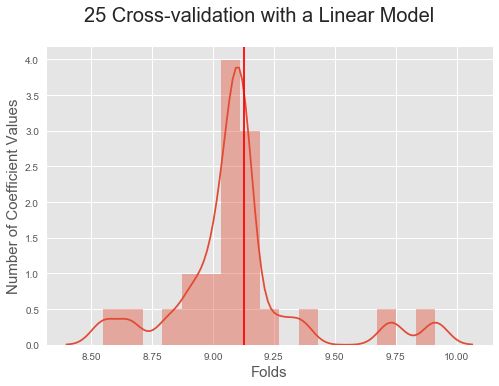

In [27]:
from sklearn.model_selection import KFold

k_fold = KFold(25)

reg_rm = linear_model.LinearRegression(fit_intercept=True, normalize=False) 
results = np.zeros((25,3))
for k, (train, test) in enumerate(k_fold.split(rm, medv)):
    print(rm[train])
    print('')
    reg_rm.fit(rm[train], medv[train])
    results[k] = k,reg_rm.coef_[0], reg_rm.score(rm[train], medv[train])
#     print("[fold {0}] coef: {1:.5f}, score: {2:.5f}".
#           format(k, reg_rm.coef_[0], reg_rm.score(rm[train], medv[train])))

import seaborn as sns

sns.distplot(results[:,1])
plt.suptitle('25 Cross-validation with a Linear Model ', fontsize = 20)
plt.axvline(x=reg_rm.coef_[0], color='r', linestyle='-', label="Coefficient with All Data")
plt.xlabel('Folds', fontsize=15)
plt.ylabel('Number of Coefficient Values', fontsize=15)


*Enter your observations here*

### 1.3 Regression lines

Create a scatterplot of housing price on rooms per house, and add the two regression lines from 1.1 (or 1.2 if you prefer to do so). Show the linear regression line in red, and the linear+quadratic regression line (which may have curvature) in blue.  Label these two regression lines with the corresponding regression equations (i.e. the slope and intercept of the line).

Bonus: Add the 95% confidence bands (i.e.,  the area that has a 95% chance of containing the true regression line) to each of these lines.

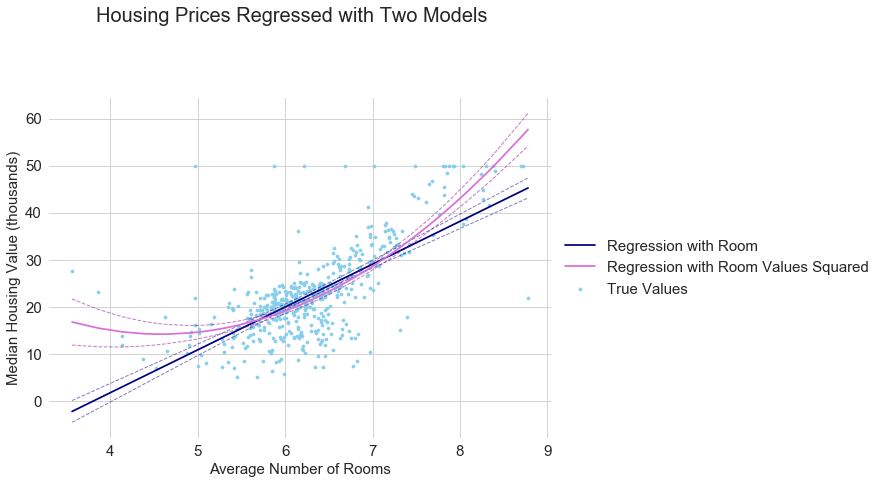

In [5]:
from kapteyn import kmpfit

x = boston['RM']
y = boston['MEDV']

# predicted Y values from 1.1(a)
reg_rm_Y = reg_rm.predict(rm)

# predicted Y values from 1.1(b)
rm2_x = np.linspace(min(rm), max(rm), 1000).reshape(1000,1)
reg_rm2_Y = reg_rm2.predict(rm2_x**2)

# confidence band for rm
def model(p, x):
    b, c = p
    return b*x+c

f = kmpfit.simplefit(model, [.1, .1], x, y)
b, c = f.params
dfdp = [x, 1]
yhat1, upper1, lower1 = f.confidence_band(x, dfdp, 0.95, model)
ix1 = np.argsort(x)

# confidence band for rm^2
def model(p, x):
    a, b, c = p
    return a*x**2+b*x+c

f = kmpfit.simplefit(model, [.1, .1, .1], x, y)
a, b, c = f.params
dfdp = [x**2, x, 1]
yhat, upper, lower = f.confidence_band(x, dfdp, 0.95, model)
ix = np.argsort(x)



fig = plt.figure(figsize=(9,7))
ax = fig.gca()
plt.style.use('ggplot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
fig.suptitle('Housing Prices Regressed with Two Models', fontsize = 20)

ax.scatter(boston['RM'], boston['MEDV'], color='skyblue', s=10, label='True Values')
for i, l in enumerate((upper1, lower1, yhat1)):
    if i == 2:
        plt.plot(x[ix1], l[ix1], color='navy', label = 'Regression with Room')
    else:
         plt.plot(x[ix1], l[ix1], color='navy',linestyle='--', lw=1,alpha=0.5, label= '_nolegend_')
for i, l in enumerate((upper, lower, yhat)):
    if i == 2:
        plt.plot(x[ix], l[ix], color='orchid', label = 'Regression with Room Values Squared')
    else:
         plt.plot(x[ix], l[ix], color='purple',linestyle='--', lw=1,alpha=0.5, label= '_nolegend_')


ax.set_facecolor('white')
plt.xlabel('Average Number of Rooms', fontsize=15)
plt.ylabel('Median Housing Value (thousands)', fontsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.subplots_adjust(bottom = None, top = 0.8)
reg_rm2_Y = reg_rm2.predict(rm**2)
plt.show()


## Part 2: Gradient descent: Linear Regression

This is where it gets fun!

### 2.1 Implement gradient descent with one independent variable (average rooms per house)

Implement the batch gradient descent algorithm that we discussed in class. Use the version you implement to regress the housing price on the number of rooms per house. Experiment with 3-4 different values of the learning rate *R*, and do the following:

* Report the values of alpha and beta that minimize the loss function
* Report the number of iterations it takes for your algorithm to converge (for each value of *R*)
* Report the total running time of your algorithm, in seconds

Some skeleton code is provided below, but you should feel free to delete this code and start from scratch if you prefer.

* *Hint 1: Don't forget to implement a stopping condition, so that at every iteration you check whether your results have converged. Common approaches to this are to (a) check to see if the loss has stopped decreasing; and (b) check if both your current parameter esimates are close to the estimates from the previous iteration.  In both cases, "close" should not be ==0, it should be <=epsilon, where epsilon is something very small (like 0.0001).*
* *Hint 2: Some people like to include a MaxIterations parameter in their gradient descent algorithm, to prevent divergence. *

In [6]:
import time

"""
Function
--------
bivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalues, yvalues : narray
    xvalues: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta: float
    co-efficient
"""
def bivariate_ols(xvalues, yvalues, R=0.01, MaxIterations=100000):
    # initialize the parameters
    start_time = time.time()

    n=len(xvalues)
    
    zeros = np.zeros(xvalues.shape[1])
    theta = np.matrix(zeros).transpose()
    cost_prior = np.inf
    
    epsilon = 0.000001
    converge = 'max iterations'
    for i in range(MaxIterations):
        loss = np.dot(xvalues, theta)-yvalues

        gradient = 1/n * np.dot(xvalues.transpose(), loss)
                                                            
        
        if LA.norm(gradient, 2) < epsilon:
            converge='L2 norm minimized'
            break
            
        cost_change = (cost_prior - 1/n* np.sum(np.asarray((np.dot(xvalues, theta)-yvalues))**2))
        if cost_change < 0:
            converge='cost increased'
            break
        cost_prior = 1/n* np.sum(np.asarray((np.dot(xvalues, theta)-yvalues))**2)
        
        theta_change = theta - (theta - R * gradient)
        if (abs(theta_change.item(0)) < epsilon) and (abs(theta_change.item(1)) < epsilon):
            converge='theta change minimized'
            break
        theta = theta - R * gradient
    
    tot_time = time.time() - start_time
#     print("Time taken: {:.2f} seconds".format(tot_time))
    return theta.item(0),  theta.item(1), i, tot_time, converge


In [7]:
X = rm
Y = medv
X = np.concatenate((np.ones((len(X),1)), X), axis=1)
X = np.matrix(X)

Y = np.matrix(Y).transpose()


R_vals = [10**(-i) for i in range(5)]
R_vals1 = np.arange(0.02, 0.10, 0.01)
R_vals = (R_vals+list(R_vals1))
R_vals.sort()
results_bivar = np.zeros((len(R_vals), 5))
conv = []
for R in R_vals:
    index = R_vals.index(R)
    alpha, beta, interations, tot_time, converge = bivariate_ols(X, Y, R, 100000)
    results_bivar[index] = [R, alpha, beta, interations, tot_time]
    conv.append(converge)
results_bivar = pd.DataFrame(results_bivar)
results_bivar.columns = ['R', 'alpha', 'beta', 'iterations', 'total time']
results_bivar['convergence'] = conv
results_bivar

,R,alpha,beta,iterations,total time,convergence
0,0.0001,-3.431046,4.191089,99999.0,10.773159,max iterations
1,0.0010,-24.084398,7.437901,99999.0,14.249144,max iterations
2,0.0100,-34.662304,9.100802,69454.0,8.276653,theta change minimized
3,0.0200,-34.666462,9.101455,37607.0,4.440754,theta change minimized
4,0.0300,-34.667849,9.101673,26194.0,2.925141,theta change minimized
5,0.0400,-34.668542,9.101782,20243.0,2.365196,theta change minimized
6,0.0500,1.126640,7.304751,1.0,0.000205,cost increased
7,0.0600,1.351968,8.765701,1.0,0.000190,cost increased
8,0.0700,1.577296,10.226651,1.0,0.000187,cost increased
9,0.0800,1.802625,11.687601,1.0,0.000183,cost increased


** Report the values of alpha and beta that minimize the loss function interpret **

I found that the best value for alpha and beta was approximatley alpha = -34.7 and a beta coefficient of 9.1. This means that given no outside effects, the average median housing value is approximately -34.7k and with each increase of rooms in house, the price of the home will increase on average of 9.1k. This makes no sense with a real-world inteprertation. Houses cannot have a negative value. If we compare these alpha beta values to the regression we plotted in 1.3, we see that the predicted alpha betas from our gradient descent does appear to match the alpha betas predicted from the linear model fit from scikit learn. 

We also note that in 1.3 that the polynomial fit for rooms provides a better overall R2 fit. Therefore, our final interpretation is that, yes, while there is some relationship between number of rooms and the average median value of a home, it is probably not perfectly linear.



** Report the number of iterations it takes for your algorithm to converge (for each value of R) **

See table above. We find that one of the best learning rate for the gradient descent is around 4.0. After this the model tends to diverge because the step size is too large.


** Report the total running time of your algorithm, in seconds **

See table. Less iterations means lower run time. Therefore it is best to use the learning rate of around 0.4 for this set of data.

### 2.2 Data normalization (done for you!)

Soon, you will implement a version of gradient descent that can use an arbitrary number of independent variables. Before doing this, we want to give you some code in case you want to standardize your features.

In [8]:
def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

### 2.3 Implement gradient descent with an arbitrary number of independent variables

Now that you have a simple version of gradient descent working, create a version of gradient descent that can take more than one independent variable.  Assume all independent variables will be continuous.  Test your algorithm using CRIM and RM as independent variables. Standardize these variables before before inputting them to the gradient descent algorithm. 

As before,  report and interpret your estimated coefficients, the number of iterations before convergence, and the total running time of your algorithm. Experiment with 2-3 different values of R.

* *Hint 1: Be careful to implement this efficiently, otherwise it might take a long time for your code to run. Commands like `np.dot` can be a good friend to you on this problem*

In [9]:
import time
"""
Function
--------
multivariate_ols
    Gradient Decent to minimize OLS. Used to find co-efficients of bivariate OLS Linear regression

Parameters
----------
xvalue_matrix, yvalues : narray
    xvalue_matrix: independent variable
    yvalues: dependent variable
    
R: float
    Learning rate
    
MaxIterations: Int
    maximum number of iterations
    

Returns
-------
alpha: float
    intercept
    
beta_array: array[float]
    co-efficient
"""

def multivariate_ols(xvalue_matrix, yvalues, R=0.01, MaxIterations=100000):
    start_time = time.time()

    n=len(xvalue_matrix)*xvalue_matrix.shape[1]

    zeros = np.zeros(xvalue_matrix.shape[1])
    theta = np.matrix(zeros).transpose()

    cost_prior = np.inf
    
    epsilon = 0.001
    gradient = np.zeros((len(theta),1))
    converge = 'max iterations'
    for i in range(MaxIterations):
        loss = np.dot(xvalue_matrix, theta)-yvalues

        gradient = 1/n * np.dot(xvalue_matrix.transpose(), loss)
       

        if LA.norm(gradient) < epsilon:
            converge='L2 norm minimized'
#             print('L2 convergence')
            break
        
        cost_change = (cost_prior - 1/n* np.sum(np.asarray((np.dot(xvalue_matrix, theta)-yvalues))**2))
#         print(cost_change)
        if cost_change < 0:
            converge='cost increased'
#             print('cost convergence')
            break
        
        theta_change = theta - (theta - R * gradient)
        if (all(abs(e) < epsilon for e in theta_change)):
            converge='theta change minimized'
#             print('theta convergence')
            break
        theta = theta - R * gradient
        
        cost_prior = 1/n* np.sum(np.asarray((np.dot(xvalue_matrix, theta)-yvalues))**2)
        
    alpha = theta.item(0)
    beta_array = theta[1:]
    
    tot_time = time.time() - start_time
#     print("Time taken: {:.2f} seconds".format(tot_time))
    return i, tot_time, theta, converge


In [10]:
X = np.asarray(boston[['RM', 'CRIM']])
Y = medv

X = standardize(X)
X_matrix = np.concatenate((np.ones((len(X),1)), X), axis=1)
X_matrix = np.matrix(X_matrix)

Y = np.matrix(Y).transpose()

R_vals = [10**(-i) for i in range(5)]
R_vals1 = np.arange(0.02, 0.10, 0.01)
R_vals = (R_vals+list(R_vals1))
R_vals = R_vals+[2,3,4,5,10,100]
R_vals.sort()
results_multivar = np.zeros((len(R_vals), 6))
conv = []
for R in R_vals:
    index = R_vals.index(R)
    iterations, tot_time,theta, converge = multivariate_ols(X_matrix, Y, R, 100000)
    results_multivar[index] = [R, theta.item(0), theta.item(1), theta.item(2), iterations, tot_time]
    conv.append(converge)
results_multivar = pd.DataFrame(results_multivar)
results_multivar.columns = ['R', 'alpha', 'beta1', 'beta2', 'iterations', 'total time']
results_multivar['convergence'] = conv
results_multivar


/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in square
/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in square


,R,alpha,beta1,beta2,iterations,total time,convergence
0,0.0001,0.000000,0.000000,0.000000,0.0,0.000191,theta change minimized
1,0.0010,19.533735,5.168588,-2.278951,6049.0,0.649123,theta change minimized
2,0.0100,22.233284,5.810782,-2.290473,1294.0,0.121644,theta change minimized
3,0.0200,22.383502,5.848992,-2.276214,750.0,0.096320,theta change minimized
4,0.0300,22.433764,5.862473,-2.269783,540.0,0.062581,theta change minimized
5,0.0400,22.458773,5.869447,-2.266050,426.0,0.044848,theta change minimized
6,0.0500,22.473077,5.873558,-2.263692,353.0,0.037579,theta change minimized
7,0.0600,22.483339,5.876584,-2.261868,303.0,0.034498,theta change minimized
8,0.0700,22.490603,5.878775,-2.260495,266.0,0.031139,theta change minimized
9,0.0800,22.495583,5.880305,-2.259510,237.0,0.025809,theta change minimized


** Report the values of alpha and beta that minimize the loss function and interpret **

I found that the best value for minimizing the loss function is alpha = 22.5, beta for the room numbers = 5.9, and beta for crime -2.3. This is a set of alpha and beta coefficients than we saw before for the previous question. We can interpret this to mean that the average median housing value for a home in boston is approximatley $22.5k. With the addition of each room, the housing value increases by about 5.9k. However, with rising crime, housing value then drops by 2.3k.

Here, we can see that having two features in our model results in more interpretable results than when we only had a single feature.


** Report the number of iterations it takes for your algorithm to converge (for each value of R) **
See table. The best learning rate was around 3. The algorithm converged in just six steps.

** Report the total running time of your algorithm, in seconds **
See table. Overall, the run time for the algorithm is much faster for multiple features than it is for just one. However, this is more likely due to standardizing the features rather than it being bivariate vs multivariate.

### 2.4 Compare standardized vs. non-standardized results

Repeat the analysis from 2.3, but this time do not standardize your variables - i.e., use the original data. Use the same three values of R (0.1, 0.01, and 0.001). What do you notice about the running time and convergence properties of your algorithm?

In [11]:
pd.set_option('display.max_columns',0) 

X = np.asarray(boston[['RM', 'CRIM']])
Y = medv

X_raw = np.concatenate((np.ones((len(X),1)), X), axis=1)
X_raw = np.matrix(X_raw)

Y = np.matrix(Y).transpose()

R_vals = [0.1, 0.01, 0.001]

# Raw data
results_raw = np.zeros((len(R_vals), 6))
conv=[]
for R in R_vals:
    index = R_vals.index(R)
    iterations, tot_time, theta, converge = multivariate_ols(X_raw, Y, R, 100000)
    results_raw[index] = [R, theta.item(0), theta.item(1), theta.item(2), iterations, tot_time]
    conv.append(converge)
results_raw = pd.DataFrame(results_raw)
results_raw.columns = ['R', 'alpha', 'beta1', 'beta2', 'iterations', 'total time']
results_raw['convergence'] = conv
results_raw

# Standardized data
X_standard = standardize(X)
X_standard = np.concatenate((np.ones((len(X),1)), X_standard), axis=1)
X_standard = np.matrix(X_standard)

results_standard = np.zeros((len(R_vals), 6))
conv = []
for R in R_vals:
    index = R_vals.index(R)
    iterations, tot_time, theta,converge = multivariate_ols(X_standard, Y, R, 100000)
    results_standard[index] = [R, theta.item(0), theta.item(1), theta.item(2), iterations, tot_time]
    conv.append(converge)
results_standard = pd.DataFrame(results_standard)
results_standard.columns = ['R', 'alpha', 'beta1', 'beta2', 'iterations', 'total time']
results_standard['convergence'] = conv
results_standard

print('Raw Data')
print(results_raw)
print('\n')
print('Standardized Data')
print(results_standard)

/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in double_scalars
/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: overflow encountered in square
/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:54: RuntimeWarning: overflow encountered in square
/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in subtract
/Users/judyjinn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in subtract


Raw Data
       R     alpha    beta1     beta2  iterations  total time             convergence
0  0.100       NaN      NaN       NaN     99999.0    9.585413          max iterations
1  0.010  0.520795  3.75518 -0.358624        54.0    0.005239  theta change minimized
2  0.001  0.531016  3.66824 -0.325217       333.0    0.032772  theta change minimized


Standardized Data
       R      alpha     beta1     beta2  iterations  total time             convergence
0  0.100  22.503494  5.882799 -2.257845       196.0    0.021711  theta change minimized
1  0.010  22.233284  5.810782 -2.290473      1294.0    0.119125  theta change minimized
2  0.001  19.533735  5.168588 -2.278951      6049.0    0.562499  theta change minimized


In the two tables above, with a learning rate of 0.1 we can see that the raw data does not converge within 100,000 iterations and diverges into infinity. However, with the standardized data, the algorithm is able to converge within 196 interations.

For a learning rate of 0.01, the raw data converges, but converges to values we do not expect for alpha and the beta coefficients. The same occurs for a learning rate of 0.001. One possibility is that there are local minima and the algorithm is getting trapped. This may be likely because if we look at the data, rooms are 1 to 2 orders of magnitude higher than crime.

When the data is standardized, all the features fall between values of -1 and 1. Therefore, the local minima should be minimized or disappear. Thus, we see that the gradient descent algorithm is able to converge towards better values. However, it does appear to get trapped in a local minimum when the learning rate is 0.001 and sets alpha to 19.5.

## 3. Prediction

Let's use our fitted model to make predictions about housing prices. Make sure to first standardize your features before proceeding.

### 3.1 Cross-Validation

Unless you were careful above, you probably overfit your data again. Let's fix that in one of two ways. If you're feeling confident, use k-fold cross-validation to re-fit the multivariate regression from 2.3 above, and report your estimated coefficients (there should be three, corresponding to the intercept and the two coefficients for CRIM and RM). Or if you want to do the quick and dirty version, randomly divide your data into a training set (66%) and testing set (34%) and use the training set to re-fit the regression from 2.3 above. 

*NOTE: * If using k-fold cross-validation, you will end up with a different set of parameters for each fold. In this case, use the parameters from the fold that has the highest test performance.

In [12]:
def compute_rmse(predictions, yvalues):
    if not isinstance(predictions, list):
        predictions = np.asarray(predictions)
    if not isinstance(yvalues, list):
        yvalues = np.asarray(yvalues)
    pred_yvals_zipped = zip(predictions, yvalues)
    rmse = np.sqrt(sum([(p-y)**2 for p, y in pred_yvals_zipped])/len(yvalues))
    if type(rmse) is np.ndarray:
        rmse = rmse[0]
    return rmse

In [13]:
X = np.asarray(boston[['RM', 'CRIM']])
Y = medv

X = standardize(X)

X_matrix = np.concatenate((np.ones((len(X),1)), X), axis=1)
X_matrix = np.matrix(X_matrix)

Y = np.matrix(Y).transpose()

from sklearn.model_selection import KFold

num_fold = 10
k_fold = KFold(num_fold, shuffle=True, random_state=42)

results_crossval = np.zeros((num_fold, 7))
conv=[]
for k, (train, test) in enumerate(k_fold.split(X_matrix, Y)):
    iterations, tot_time, theta, converge = multivariate_ols(X_matrix[train], Y[train], 3.0, 100000)
    predictions = X_matrix[train]*theta
    RMSE = compute_rmse(predictions, Y[train])
    results_crossval[k] = [k, theta.item(0), theta.item(1), theta.item(2), iterations, tot_time, RMSE]
    conv.append(converge)
results_crossval = pd.DataFrame(results_crossval)
results_crossval.columns = ['K', 'alpha', 'beta(room)', 'beta(crime)', 'iterations', 'total time', 'RMSE']
results_crossval['convergence'] = conv
results_crossval

results_crossval

,K,alpha,beta(room),beta(crime),iterations,total time,RMSE,convergence
0,0.0,22.587444,5.848360,-2.288161,6.0,0.000973,6.364290,L2 norm minimized
1,1.0,22.474419,6.133908,-2.166923,6.0,0.001705,6.031232,L2 norm minimized
2,2.0,22.601285,5.735973,-2.357204,6.0,0.001253,6.367014,L2 norm minimized
3,3.0,22.464268,5.821336,-2.242678,6.0,0.000762,6.289985,L2 norm minimized
4,4.0,22.470084,6.196735,-2.197854,5.0,0.000533,6.025365,L2 norm minimized
5,5.0,22.500528,5.645589,-2.501585,6.0,0.000622,6.259075,L2 norm minimized
6,6.0,22.527168,6.063424,-2.186147,5.0,0.000560,6.138966,L2 norm minimized
7,7.0,22.602584,5.765553,-2.190988,6.0,0.000624,6.235648,L2 norm minimized
8,8.0,22.557265,5.817250,-2.156706,6.0,0.000623,6.311085,L2 norm minimized
9,9.0,22.538893,5.913210,-2.293307,6.0,0.000612,6.218520,L2 norm minimized


Cross-validating using 10 folds, I found that the best set of coefficents was alpha = 22.47,  beta (rooms) = 6.13, and beta (crime) = -2.17. The RMSE was 6.03, which was the lowest of the 10.

This value is very similar to the ones seen in question 2.2, which we do expect. However, because we have split the data into multiple folds to run each gradient descent before fitting our linear model, we expect that these values for the coefficients are not a result of overfitting.

### 3.2 Predicted values and RMSE

Let's figure out how accurate this predictive model turned out to be. Compute the RMSE on your test cases, i.e. take the model parameters that you found above, predict the values for just the test instances, and compare the actual to the predicted values. If you did this the k-fold way above, this will be the average RMSE across the k test sets. If you did this the quick and dirty way above, this will just be the RMSE on your single test set.

What is your test RMSE?  How does it compare to the performance of your nearest neighbor algorithm from the last problem set?

In [14]:
X = np.asarray(boston[['RM', 'CRIM']])
Y = medv

X = standardize(X)

X_matrix = np.concatenate((np.ones((len(X),1)), X), axis=1)
X_matrix = np.matrix(X_matrix)

Y = np.matrix(Y).transpose()

from sklearn.model_selection import KFold
# from prior question
theta = np.array((22.474419, 6.133908, -2.166923)).reshape(3,1)

num_folds = 10
k_fold = KFold(num_folds, shuffle=True, random_state=42)

results_RMSE = np.zeros((num_folds, 2))
for k, (train, test) in enumerate(k_fold.split(X_matrix, Y)):
    predictions = X_matrix[test]*theta
    RMSE = compute_rmse(predictions, Y[test])
    results_RMSE[k] = [k, RMSE]
results_RMSE = pd.DataFrame(results_RMSE)
results_RMSE.columns = ['K', 'RMSE']

print('Average RMSE is', results_RMSE.mean()['RMSE'])
results_RMSE


Average RMSE is 6.14200701456


,K,RMSE
0,0.0,4.819851
1,1.0,7.803947
2,2.0,4.710490
3,3.0,5.622716
4,4.0,7.841169
5,5.0,5.805996
6,6.0,7.026262
7,7.0,6.095333
8,8.0,5.374472
9,9.0,6.319834


Overall, using the model with the best coefficients found from the cross-validation, I had an average RMSE score of 6.14. This is better than my nearest neighbors RMSE from the last homework set. My RMSE from that model with the same data was 6.73. Thus, the two algorithms are performing about the same. However, this one is performing slightly better, possibly because we have also cross-validated to find the best learning rate to find the best alpha and beta values.

### Extra Credit 1: Logistic Regression

For extra credit, implement logistic regression using gradient descent. Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $40,000. Use your model  a logistic regression of EXPENSIVE on CHAS and RM. Report your results.

In [15]:
# Your code here

*Discuss your results here*

## 4 Regularization 

### 4.1 Get prepped

Step 1: Create new interaction variables between each possible pair of the F_s features. If you originally had *K* features, you should now have K+(K*(K+1))/2 features. Standardize all of your features.

from sklearn.model_selection import train_test_splitStep 2: For simplicity, generate a single training and testing set.  Randomly sample 66% of your data and call this the training set, and set aside the remaining 34% as your test set.

In [16]:
from sklearn.model_selection import train_test_split

boston_features = boston.drop(['MEDV'], axis=1)
boston_features.head(1)
feature_list = list(boston_features.columns)
for f1 in feature_list:
    for f2 in feature_list[feature_list.index(f1):]:
        boston_features[f1+'*'+f2] = boston_features[f1]*boston_features[f2]
            
boston_features = np.asarray(boston_features)
boston_features = standardize(boston_features)
X_matrix = np.concatenate((np.ones((len(boston_features),1)), boston_features), axis=1)
X_matrix = np.matrix(X_matrix)

Y = medv
Y = np.matrix(Y).transpose()

X_train, X_test, Y_train, Y_test = train_test_split(X_matrix, Y, test_size=0.34, random_state=42)

### 4.2 Overfitting (sort of)
Now, using your version of multivariate regression from 2.3, let's overfit the training data. Using your training set, regress housing price on as many of those K+(K*(K+1))/2 features as you can.  If you get too greedy, it's possible this will take a long time to compute, so start with 5-10 features, and if you have the time, add more features.

Report the RMSE when you apply your model to your training set and to your testing set. How do these numbers compare to each other, and to the RMSE from 3.2 and nearest neighbors?

In [17]:
start_time = time.time()
iterations, tot_time, theta, converge  = multivariate_ols(X_train, Y_train, 0.01, 100000)
tot_time = time.time() - start_time
print("Time taken: {:.2f} seconds".format(tot_time))

# train set
predictions = X_train*theta
RMSE = compute_rmse(predictions, Y_train)
print('RMSE of train set', RMSE)

# test set
predictions = X_test*theta
RMSE = compute_rmse(predictions, Y_test)
print('RMSE of test set', RMSE)

print('RMSE of 4 nearest neighbors', 5.102109)

Time taken: 1.11 seconds
RMSE of train set 11.5106421536
RMSE of test set 12.4941734913
RMSE of 4 nearest neighbors 5.102109


Using all of the data, and overfitting it, I find that the model does not perform very well. It has a RMSE value of 11.5 when validated on its own training data and a RMSE value of 12.5 when used on the test data. This makes sense for the test data, as we expect that if the model was overfitted, it should not generalize to other sets of data.

In comparison, the RMSE for my nearest neighbors algorithm with 4 neighbors and 6 features performs rather well with a RMSE of 5.1. Therfore, the nearest neighbor algorithm improved its accuracy with more features.

Most likely, we added far too many features for our linear model to use and it no longer is doing a good job predicting while trying to account for the 104 features. Thus, we would prefer to use a regularization method to penalize an overly complicated model and find one that fits the best.

### 4.3 Ridge regularization
Incorporate L2 (Ridge) regularization into your multivariate_ols regression. Write a new version of your gradient descent algorithm that includes a regularization term "lambda" to penalize excessive complexity. 

Use your regularized regression to re-fit the model from 4.2 above on your training data. Try this for several different values of lambda, and report your RMSE for each lambda separately for your training and testing data. How do these numbers compare to each other, to the RMSE from 4.2,  to the RMSE from 2.3, and to the RMSE from nearest neighbors?

Go brag to your friends about how you just implemented ridge-regularized multivariate regression using gradient descent optimization, from scratch. If you still have friends.

In [18]:
import time

def ridge(xvalue_matrix, yvalues, R=0.01, L=0.01, MaxIterations=100000):
    start_time = time.time()

    n=len(xvalue_matrix)*xvalue_matrix.shape[1]

    zeros = np.zeros(xvalue_matrix.shape[1])
    theta = np.matrix(zeros).transpose()

    cost_prior = np.inf
    
    epsilon = 0.001
    gradient = np.zeros((len(theta),1))

    for i in range(MaxIterations):
        loss = np.dot(xvalue_matrix, theta)-yvalues

        gradient = 1/n * np.dot(xvalue_matrix.transpose(), loss)

        if LA.norm(gradient) < epsilon:
#             print('L2 convergence')
            break
        
        cost_change = cost_prior - 1/n*(np.sum(np.asarray((np.dot(xvalue_matrix, theta)-yvalues))**2)  + L* np.sum(np.asarray(theta)**2))
        if cost_change < 0:
#             print('cost convergence')
            break
        cost_prior = 1/n* (np.sum(np.asarray((np.dot(xvalue_matrix, theta)-yvalues))**2) + L*np.sum(np.asarray(theta)**2)
)
        theta_change = theta - (theta - R * gradient)
        if (all(abs(e) < epsilon for e in theta_change)):
#             print('theta convergence')
            break
        theta = theta - R * gradient
        
    alpha = theta.item(0)
    beta_array = theta[1:]
    
    tot_time = time.time() - start_time
#     print("Time taken: {:.2f} seconds".format(tot_time))
    return i, tot_time, theta, R, L

In [19]:
L_vals = [0.0001, 0.001, 1, 10, 100]
results_L = np.zeros((len(L_vals), 3))
for i, L in enumerate(L_vals):
    iterations, tot_time, theta, R, L  = ridge(X_train, Y_train, 3.0, L, 100000)
    train_predictions = X_train*theta
    train_RMSE = compute_rmse(train_predictions, Y_train)
    test_predictions = X_test*theta
    test_RMSE = compute_rmse(test_predictions, Y_test)
    results_L[i] = [L, train_RMSE, test_RMSE]
results_L = pd.DataFrame(results_L)
results_L.columns = ['L', 'train_RMSE', 'test_RMSE']
results_L

,L,train_RMSE,test_RMSE
0,0.0001,2.835807,3.432784
1,0.0010,2.835807,3.432784
2,1.0000,2.835807,3.432784
3,10.0000,3.231801,3.630954
4,100.0000,6.596225,7.470797


In the table above  are my results from a ridge regression where the model was penalized for having too many parameters. A lower value of lambda, between 0 and 1 did the best job of regularizing the model to reduce RMSE. As expected, the test sets' RMSE values are higher than the training sets'.

In comparison to the overfitted data which had a RMSE value of 11.5 and 12.9 (training and test respectively), this ridge regression resulted in a much better model.When we compare it to the simpler model with just two parameters for rooms and crime rate which had a RMSE of 7.19, we see that this ridge regression model also performed better.

Finally, when we compare it to the nearest neighbor's algorithm from the last problem set, we see it also beat that RMSE value (5.1). 

In conclusion, we can see the effectiveness of regularization when building models. Choosing the proper penalty value (lambda) is also important. Here, lamda appears to be most effective around a value of 1.

### Extra Credit 2: Cross-validate lambda

Use k-fold cross-validation to select the optimal value of lambda. Report the average RMSE across all training sets, and the average RMSE across all testing sets. How do these numbers compare to each other, to the RMSE from your previous efforts?  Finally, create a scatter plot that shows RMSE as a function of lambda.

In [20]:
num_folds = 10
k_fold = KFold(num_folds, shuffle=True, random_state=42)

L_vals = [10**(-i)*1000000 for i in range(10)]

L_train = np.zeros((len(L_vals), num_folds+1))
L_test = np.zeros((len(L_vals), num_folds+1))
for k, (train, test) in enumerate(k_fold.split(X_matrix, Y)):
    for i, L in enumerate(L_vals):
        iterations, tot_time, theta, R, L = ridge(X_matrix[train], Y[train], 3.0, L)
        
        train_predictions = X_matrix[train]*theta
        train_RMSE = compute_rmse(train_predictions, Y[train])
        L_train[i, 0] = L
        L_train[i, k+1] = train_RMSE
        
        test_predictions = X_matrix[test]*theta
        test_RMSE = compute_rmse(test_predictions, Y[test])
        L_test[i, 0] = L
        L_test[i, k+1] = test_RMSE
        
L_train = pd.DataFrame(L_train)
L_train.columns = ['L']+['fold '+str(i+1) for i in range(num_folds)]
L_train['log(L)'] = np.log10(L_train['L'])
L_train['average_RMSE'] = L_train.loc[:, 'fold 1':].mean(axis=1)

L_test = pd.DataFrame(L_test)
L_test.columns = ['L']+['fold '+str(i+1) for i in range(num_folds)]
L_test['log(L)'] = np.log10(L_test['L'])
L_test['average_RMSE'] = L_test.loc[:, 'fold 1':].mean(axis=1)

print('RMSE of training data')
print(L_train[['L', 'average_RMSE']])

print('\n')

print('RMSE of test data')
print(L_test[['L', 'average_RMSE']])



RMSE of training data
             L  average_RMSE
0  1000000.000     21.391916
1   100000.000     21.301007
2    10000.000     19.859513
3     1000.000     14.564216
4      100.000      5.412620
5       10.000      2.997088
6        1.000      2.763902
7        0.100      2.672992
8        0.010      2.582083
9        0.001      2.491174


RMSE of test data
             L  average_RMSE
0  1000000.000     21.477266
1   100000.000     21.386357
2    10000.000     20.053277
3     1000.000     14.961738
4      100.000      5.836432
5       10.000      3.371886
6        1.000      3.198775
7        0.100      3.107866
8        0.010      3.016957
9        0.001      2.926048


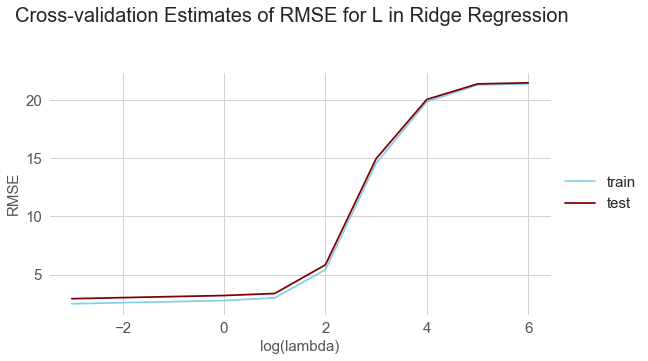

In [21]:
fig = plt.figure(figsize=(9,5))
ax = fig.gca()
plt.style.use('ggplot')
ax.grid(color='lightgray', linestyle='-', linewidth=1)
fig.suptitle('Cross-validation Estimates of RMSE for L in Ridge Regression', fontsize = 20)

plt.plot(L_train['log(L)'], L_train['average_RMSE'], color='skyblue', label = 'train')
plt.plot(L_test['log(L)'], L_test['average_RMSE'], color='maroon', label ='test')

ax.set_facecolor('white')
plt.xlabel('log(lambda)', fontsize=15)
plt.ylabel('RMSE', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15)
plt.subplots_adjust(bottom = None, top = 0.8)
plt.show()

### (Showoff) Extra Credit 3: Lambda and coefficients

If you're feeling extra-special, create a parameter plot that shows how the different coefficient estimates change as a function of lambda. To make this graph intelligible, only include the *K* original F_s features in this plot

In [22]:
boston_features = boston.drop(['MEDV'], axis=1)
boston_features.head(1)
boston_features = standardize(boston_features)
X_matrix = np.concatenate((np.ones((len(boston_features),1)), boston_features), axis=1)
X_matrix = np.matrix(X_matrix)

feature_list = list(boston_features.columns)

Y = medv
Y = np.matrix(Y).transpose()

L_vals = [10**(-i)*10000 for i in range(10)]
L_coeff = np.zeros((len(L_vals), len(feature_list)+3))
for i, L in enumerate(L_vals):
    iterations, tot_time, theta, R, L = ridge(X_matrix, Y, 3.0, L)
    predictions = X_matrix*theta
    RMSE = compute_rmse(predictions, Y)
    L_coeff[i] = [L, RMSE] + [theta.item(i) for i in range(len(theta))]
L_coeff = pd.DataFrame(L_coeff)
L_coeff.columns = ['L', 'RMSE', 'alpha'] + feature_list
L_coeff

,L,RMSE,alpha,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,10000.00000,18.887263,4.828458,-0.759648,0.709666,-0.952387,0.345063,-0.841335,1.369066,-0.742171,0.492075,-0.751368,-0.922481,-0.999761,0.656538,-1.452354
1,1000.00000,12.202442,11.603081,-0.607738,0.483838,-0.625785,0.727309,-0.451016,2.271465,-0.323084,-0.363088,-0.224072,-0.575258,-1.327899,0.620426,-1.992039
2,100.00000,5.523347,19.961244,-0.594301,0.439443,-0.475852,0.890770,-0.504685,3.217378,-0.154246,-1.325714,0.361140,-0.403443,-1.708410,0.798267,-2.944219
3,10.00000,4.686129,22.532806,-0.863612,0.982204,-0.098208,0.716253,-1.938281,2.735705,-0.028345,-3.054311,2.031291,-1.395874,-2.024908,0.856984,-3.719404
4,1.00000,4.679829,22.532806,-0.910280,1.063090,0.088142,0.690015,-2.049049,2.680926,0.012438,-3.107392,2.520541,-1.919311,-2.056712,0.855661,-3.743241
5,0.10000,4.679829,22.532806,-0.910280,1.063090,0.088142,0.690015,-2.049049,2.680926,0.012438,-3.107392,2.520541,-1.919311,-2.056712,0.855661,-3.743241
6,0.01000,4.679829,22.532806,-0.910280,1.063090,0.088142,0.690015,-2.049049,2.680926,0.012438,-3.107392,2.520541,-1.919311,-2.056712,0.855661,-3.743241
7,0.00100,4.679829,22.532806,-0.910280,1.063090,0.088142,0.690015,-2.049049,2.680926,0.012438,-3.107392,2.520541,-1.919311,-2.056712,0.855661,-3.743241
8,0.00010,4.679829,22.532806,-0.910280,1.063090,0.088142,0.690015,-2.049049,2.680926,0.012438,-3.107392,2.520541,-1.919311,-2.056712,0.855661,-3.743241
9,0.00001,4.679829,22.532806,-0.910280,1.063090,0.088142,0.690015,-2.049049,2.680926,0.012438,-3.107392,2.520541,-1.919311,-2.056712,0.855661,-3.743241


As L goes up, RMSE increases, and also the model coefficients stray from optimal, which is expected since we see RMSE increasing. Therefore, large lambdas are bad and they should be lower.